In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("C:/Python36/Projects/age detection/train.csv")
df.head()

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE


In [3]:
df.shape

(19906, 2)

In [4]:
df.nunique()

ID       19906
Class        3
dtype: int64

In [5]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

In [6]:
#df['Class']=df['Class'].astype('category')
#df['age'] = df['Class'].cat.codes

In [7]:
df.head(10)

,ID,Class
0,377.jpg,0
1,17814.jpg,2
2,21283.jpg,0
3,16496.jpg,2
4,4487.jpg,0
5,6283.jpg,0
6,23495.jpg,2
7,7100.jpg,2
8,6028.jpg,2
9,22617.jpg,1


In [8]:
def img_show(img):
    plt.imshow(img,cmap='gray')
    plt.show()

In [9]:
images = [cv2.resize(cv2.imread("C:/Python36/Projects/age detection/Train/"+s ,  0),(40,40)) for s in df["ID"]]
images = [tf.keras.utils.normalize(i) for i in images]

images = np.array(images)
images = images.reshape(19906,40,40,1)
images.shape

(19906, 40, 40, 1)

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout, Activation
from tensorflow.keras.models import Sequential


model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(40, 40, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dense(3))
model.add(Activation('sigmoid'))

In [11]:
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy" , metrics = ["accuracy"])

In [12]:
train = images
y = df["Class"].values

In [13]:
model.fit(train, y, epochs = 10, batch_size = 64)

Train on 19906 samples
Epoch 1/10
19906/19906 [==============================] - 29s 1ms/sample - loss: 0.9088 - accuracy: 0.5649
Epoch 2/10
19906/19906 [==============================] - 29s 1ms/sample - loss: 0.8336 - accuracy: 0.6273
Epoch 3/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.8030 - accuracy: 0.6456
Epoch 4/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.7811 - accuracy: 0.6590s - loss: 0.7815 - accuracy: 0.
Epoch 5/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.7579 - accuracy: 0.6728
Epoch 6/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.7352 - accuracy: 0.6790
Epoch 7/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.7158 - accuracy: 0.6931
Epoch 8/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.6861 - accuracy: 0.7080
Epoch 9/10
19906/19906 [==============================] - 27s 1ms/sample - loss: 0.6599 - 

In [14]:
model.save('AgePrediction.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: AgePrediction.model\assets


In [7]:
import tensorflow as tf
import pandas as pd
import cv2
import numpy as np
model = tf.keras.models.load_model("AgePrediction.model")

In [16]:
json = model.to_json()
with open("model2.json", "w") as json_file:
    json_file.write(json)
model.save_weights('model2.h5')

In [18]:
from tensorflow.keras.models import model_from_json
json = open('model2.json','r')
model = json.read()
model = model_from_json(model)
model.load_weights('model2.h5')
print(model)

In [8]:
df_test = pd.read_csv('C:/Python36/Projects/age detection/test.csv')
images = [cv2.imread("C:/Python36/Projects/age detection/Test/"+s, 0) for s in df_test['ID']]
test = [cv2.resize(image,(40,40)) for image in images]
test = [tf.keras.utils.normalize(p) for p in test]
test = np.array(test)
test = test.reshape((6636,40,40,1))
test.shape

(6636, 40, 40, 1)

In [9]:
prediction = model.predict_classes(test)
prediction

array([0, 2, 1, ..., 2, 0, 2], dtype=int64)

In [10]:
images = [cv2.imread("C:/Python36/Projects/age detection/Test" + s,  0) for s in df_test['ID']]

In [11]:
age = list(prediction)
age

[0,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,


In [12]:
for i in range(len(age)):
    if age[i] == 0:
        age[i] = 'MIDDLE'
    elif age[i] == 1:
        age[i] = 'OLD'
    else:
        age[i] = 'YOUNG'

In [13]:
age

['MIDDLE',
 'YOUNG',
 'OLD',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'YOUNG',
 'OLD',
 'YOUNG',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'YOUNG',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'OLD',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE',
 'MIDDLE

In [20]:
dic = {'ID':df_test['ID'], 'Class':age}

x = pd.DataFrame.from_dict(dic)
x.to_csv('C:/Python36/Projects/age detection/output.csv', index=False)

In [21]:
import matplotlib.pyplot as plt
def pred_image(img):
    plt.imshow(cv2.imread('C:/Python36/Projects/age detection/Test/'+img,0),cmap='gray')
    plt.show()
    print(x[x['ID']==img])

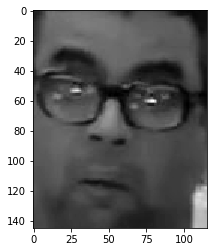

         ID   Class
3844  6.jpg  MIDDLE


In [22]:
pred_image('6.jpg')

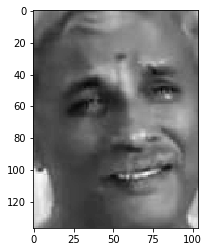

           ID Class
1333  213.jpg   OLD


In [23]:
pred_image('213.jpg')

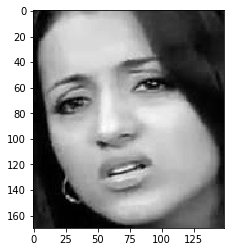

           ID  Class
3936  276.jpg  YOUNG


In [24]:
pred_image('276.jpg')

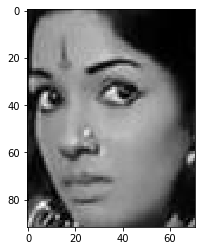

           ID  Class
3195  297.jpg  YOUNG


In [25]:
pred_image('297.jpg')